In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

# Load and explore the Cars Dataset
For these exercises we'll be exploring the auto data available [here](https://archive.ics.uci.edu/ml/datasets/Automobile).  The goal is to be able to predict auto price from the 

#### Data Exploration
##### Read the data in
Use pandas `read_csv()` to load the data into a dataframe and then call `head()` to make sure everything looks good.

In [2]:
# read in the car dataset
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=None)

columns= ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=columns
# Use head to view the first few rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

**Lets keep numeric data ** 
- Create a list of columns to keep
- Select out only those columns from the dataframe and reassign the dataframe to that selection
- Use `head()` & `info()` to make sure everything worked as expected

In [5]:
cars = df.select_dtypes(exclude=['object'])
cars.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


It looks like some of our features (even our targe feature :'price') is listed as an object.    
Run cars.head(10), and we will see why!  

In [6]:
# cars.head(10)
cars['price'] = df['price']
cars.head(10)

/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450
5,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25,15250
6,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25,17710
7,1,105.8,192.7,71.4,55.7,2954,136,8.5,19,25,18920
8,1,105.8,192.7,71.4,55.9,3086,131,8.3,17,20,23875
9,0,99.5,178.2,67.9,52.0,3053,131,7.0,16,22,?


In [7]:
cars = cars.replace('?', np.NaN)
cars['price'] = cars['price'].astype(float)

We can see from the above output, that only a few entries where unknown in the first place.   
To keep things simple for now, lets just go ahead and drop the entries that were unknown: 


In [8]:
print(cars.shape)
cars=cars.dropna()
print(cars.shape)

(205, 11)
(201, 11)


Before we begin modeling, use the [`corr()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html#pandas.DataFrame.corr) function to get a feel for the correlations among the different variables, especially with regard to 'price'.

In [9]:
cars.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.182196,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,-0.650546,-0.679571,0.872335
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,0.331425,0.268465,0.071107
city-mpg,-0.035527,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,0.331425,1.000000,0.972044,-0.686571
highway-mpg,0.036233,-0.543304,-0.698142,-0.680635,-0.104812,-0.794889,-0.679571,0.268465,0.972044,1.000000,-0.704692


Take a look at only the 'price' column of the correlations and order it in descending order wih [`sort_values()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)

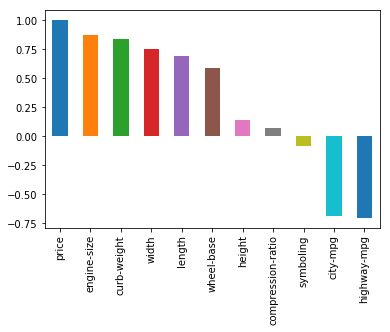

In [12]:
# Get the correlations with 'price' sorted in descending order
cars.corr()['price'].sort_values(ascending=False).plot(kind='bar');

You should now have a better feel for which variables might be most valuable for your model.
Q :  Do correlations provide the 'entire picture' of what is happening with our model? 
A:  Nope. It can give us an idea : but corrs will only provide the relationship with the response variable (all other factors being held constant) 

Now use ***seaborn's*** `pairplot()` function to visualize these correlations for the variables.  What do you think of our distributions?

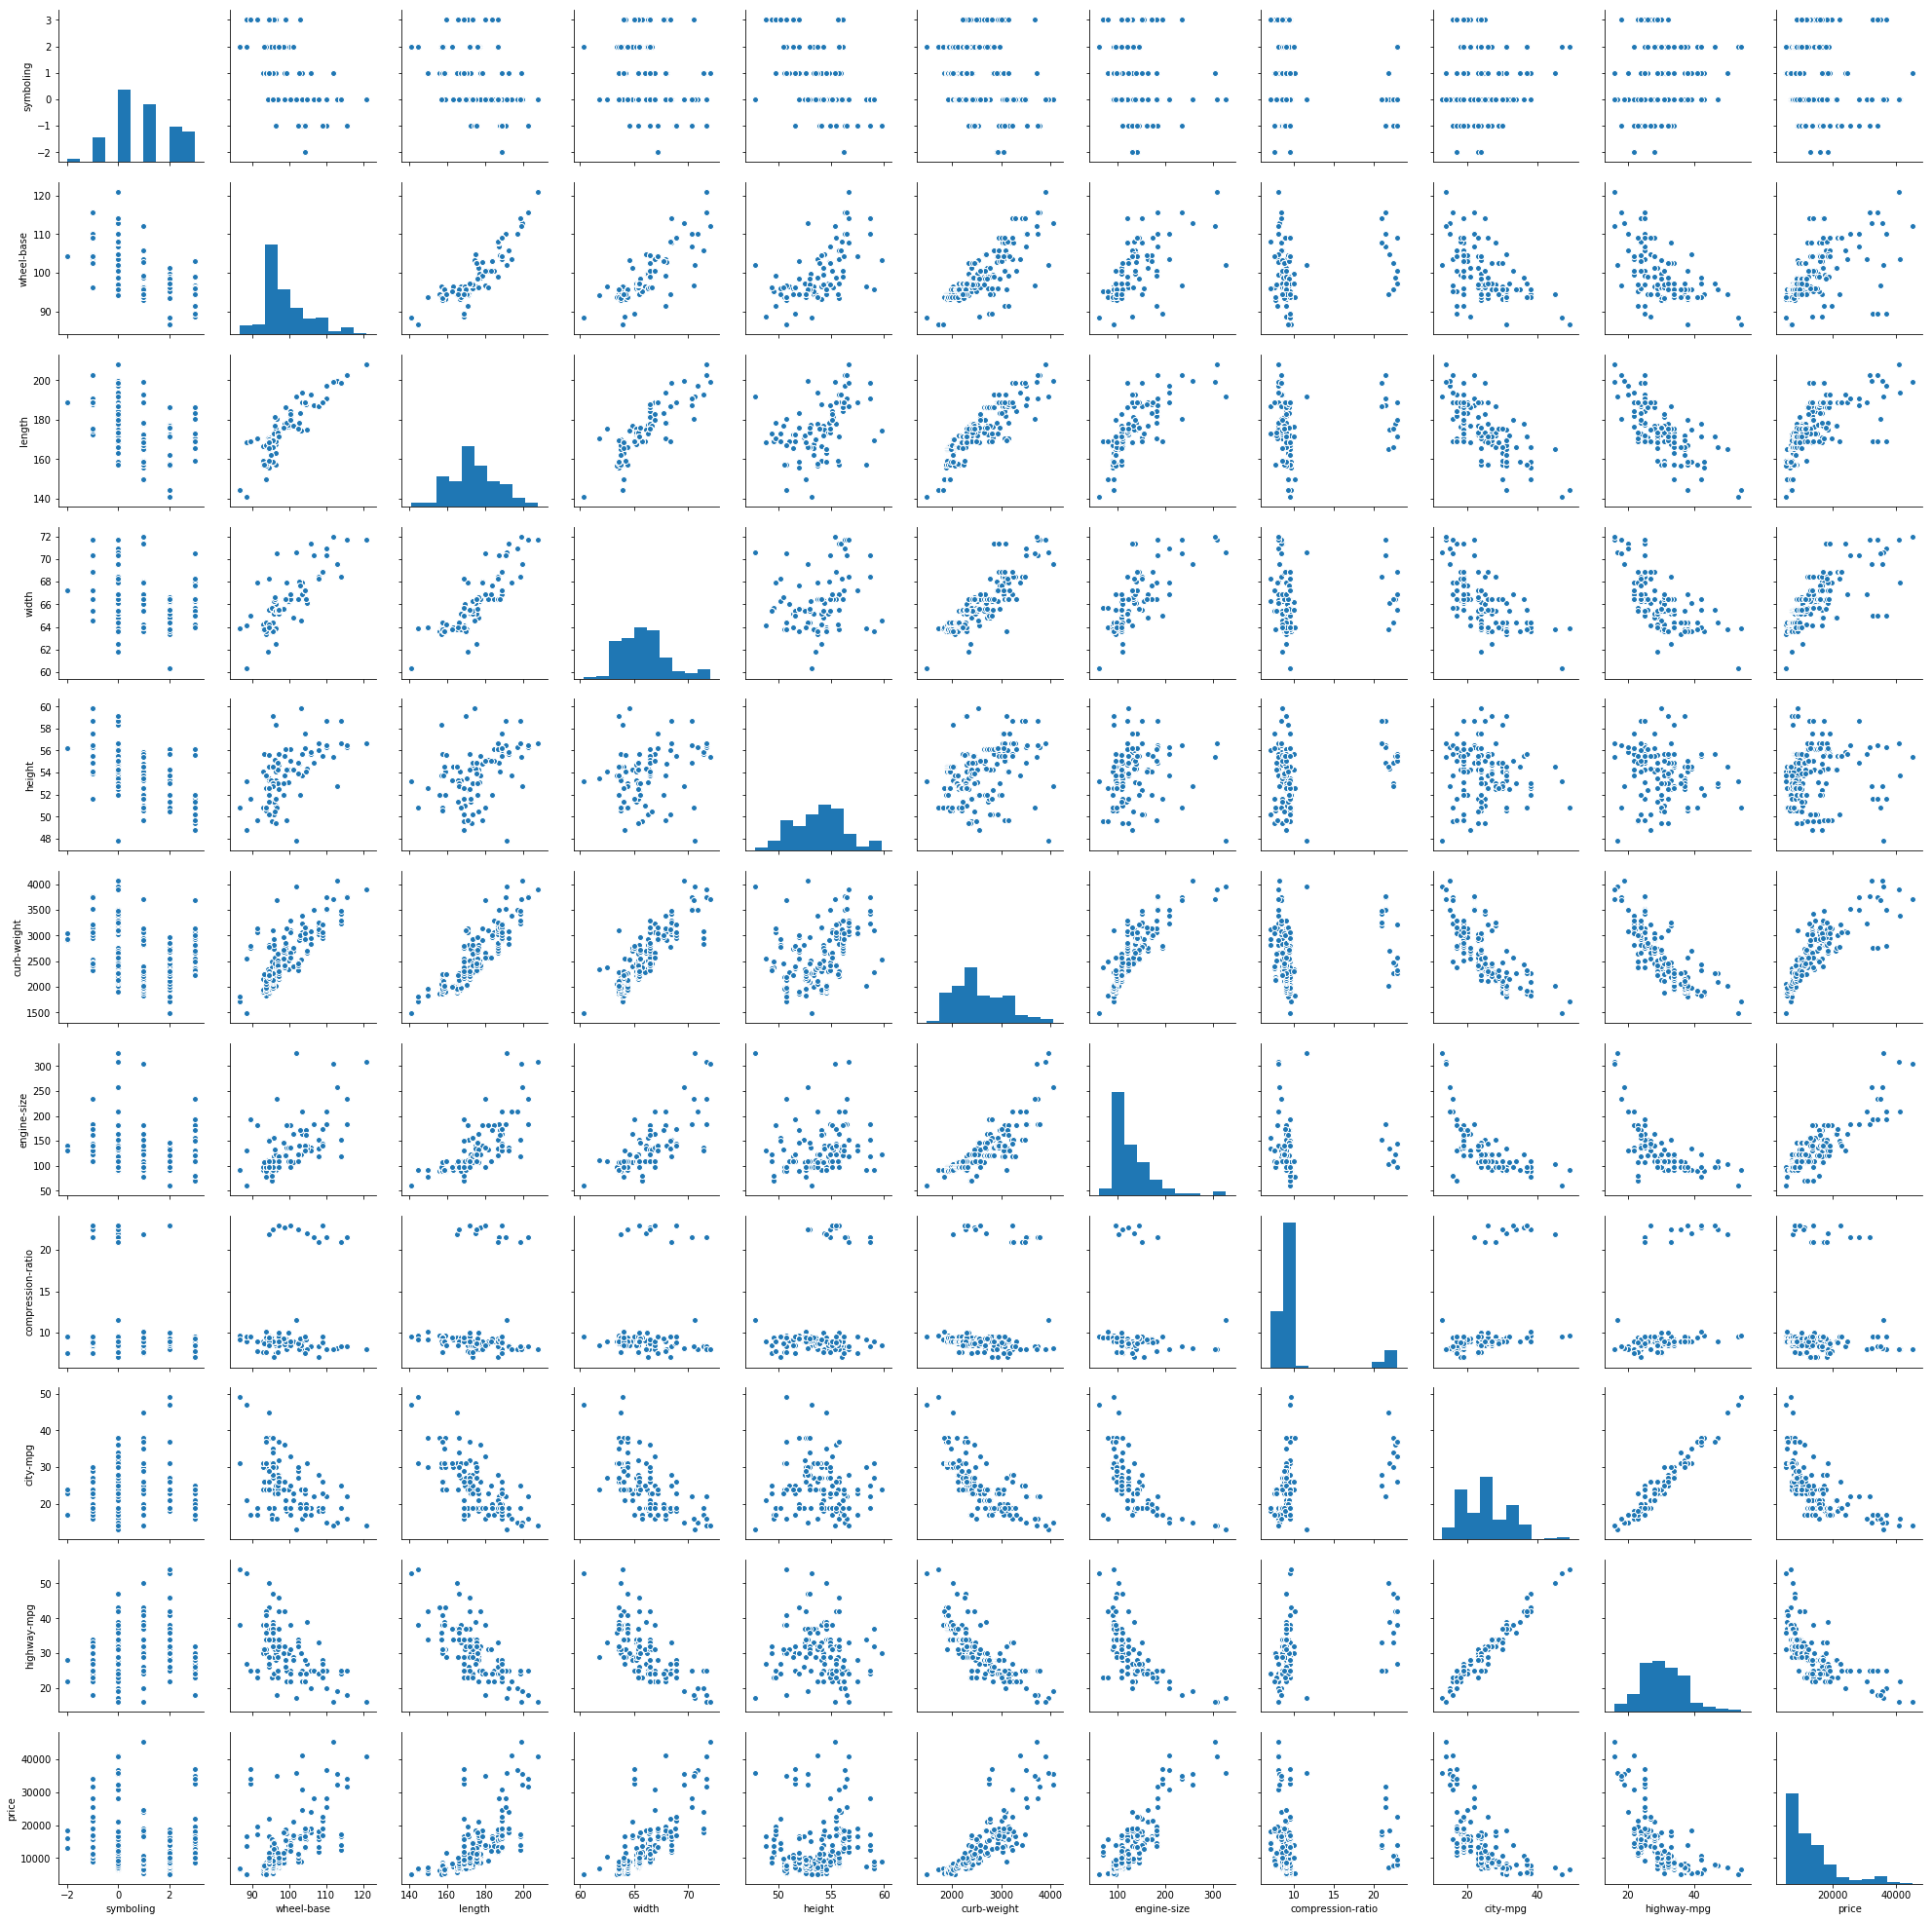

In [13]:
# Let's try visualizing some of these pairwise correlations with seaborn
g=sns.pairplot(cars)

In [14]:
cars.columns = [x.replace("-", "_") for x in cars.columns]

In [15]:
X = pd.get_dummies(df.make, prefix="make", drop_first=True)
X.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
cars2=cars.join(X)

In [17]:
cars2.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,...,0,0,0,0,0,0,0,0,0,0


# Now let's actually start doing some tuning using SkLearn's toolset.

In [18]:
cars2.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg', 'price',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso

X = cars2[[x for x in cars2.columns if x != 'price']] 
y = cars2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**We need to scale our data if we do regularization!**

In [40]:
from sklearn.preprocessing import StandardScaler

ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)

In [41]:
model = Lasso()
parameters = {'alpha': [1e-5,1e-3,1e-1,1,1e2, 1e3], 'fit_intercept': [True,False]}
grid = GridSearchCV(model,parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.001, 0.1, 1, 100.0, 1000.0], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [42]:
grid.cv_results_

/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/

{'mean_fit_time': array([0.00433621, 0.00420699, 0.00525508, 0.00698256, 0.00261917,
        0.001966  , 0.00116515, 0.00148396, 0.00069013, 0.00067697,
        0.00076256, 0.00052299]),
 'std_fit_time': array([9.88443296e-04, 1.03634868e-03, 1.07678430e-03, 2.54798120e-03,
        2.36446647e-04, 4.97115739e-04, 1.06947357e-04, 2.23107892e-04,
        3.91136125e-05, 8.07994339e-05, 1.87506935e-04, 3.49832776e-05]),
 'mean_score_time': array([0.00036139, 0.00039821, 0.00058503, 0.00099273, 0.00050735,
        0.0002522 , 0.00019751, 0.00018425, 0.0001647 , 0.00016446,
        0.00022459, 0.00017109]),
 'std_score_time': array([3.39276926e-05, 6.85073125e-05, 2.22949924e-04, 5.40855884e-04,
        1.48473416e-04, 6.67422823e-05, 3.04394706e-05, 1.37188296e-05,
        2.68641777e-06, 2.63082776e-06, 5.49793450e-05, 1.11089755e-05]),
 'param_alpha': masked_array(data=[1e-05, 1e-05, 0.001, 0.001, 0.1, 0.1, 1, 1, 100.0,
                    100.0, 1000.0, 1000.0],
              mask=[Fals

In [43]:
def print_test_scores(grid):
    for ix in range(5):
        key = "split{}_test_score".format(ix)
        print(key,grid.cv_results_[key])
        
print_test_scores(grid)

split0_test_score [ -1948.02023552 -16023.8535324   -1948.01589559 -16023.84644898
  -1947.58163612 -16023.13639864  -1943.65043824 -16016.6733527
  -1755.22598492 -15407.82170521  -3207.76446222 -13900.41326471]
split1_test_score [ -1458.52743028 -15586.53325789  -1458.52075729 -15586.52069759
  -1457.85358383 -15585.26461993  -1451.79660241 -15573.84707073
  -1355.79648501 -14918.19567265  -1581.94013789 -12806.99796751]
split2_test_score [ -1670.32294928 -14882.1233143   -1670.31997461 -14882.11420515
  -1670.01797161 -14881.20208565  -1667.21137018 -14873.22790681
  -1597.69387812 -14351.44445227  -2396.03139338 -13374.08611944]
split3_test_score [ -1761.79515685 -65392.79898678  -1761.792075   -65392.73228395
  -1761.48496694 -65386.05168799  -1758.70195922 -65325.52095311
  -1756.5345973  -58998.99727584  -2339.40750984 -13355.44614231]
split4_test_score [ -1991.95087801 -14658.17969202  -1991.95200288 -14658.17422801
  -1992.06316269 -14657.62721674  -1992.87461158 -14652.663401

In [44]:
type(grid.best_estimator_)

sklearn.linear_model.coordinate_descent.Lasso

In [45]:
X_test_scaled = ssX.transform(X_test)
best_lasso = grid.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)
for true,pred in zip(y_test[:20], lasso_pred[:20]):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 6745.558057894845, $1503.4419421051552
pred, resid: 29102.00922963328, $12212.99077036672
pred, resid: 6911.227295982608, $-56.22729598260776
pred, resid: 7652.721154126097, $1605.2788458739033
pred, resid: 14950.087192240584, $-3100.087192240584
pred, resid: 5558.654885538442, $13.345114461558296
pred, resid: 34633.38559192913, $422.6144080708691
pred, resid: 10719.782897088422, $-731.782897088422
pred, resid: 17514.651224887606, $-1516.651224887606
pred, resid: 30870.158890775077, $4679.841109224923
pred, resid: 29641.660296644804, $-1465.6602966448045
pred, resid: 8586.928642913945, $908.0713570860553
pred, resid: 13032.284623846615, $-3043.2846238466154
pred, resid: 10281.971471225525, $-1782.9714712255245
pred, resid: 14025.021657921789, $-730.0216579217886
pred, resid: 8388.695220000078, $-613.6952200000778
pred, resid: 12263.554283392055, $-3418.5542833920554
pred, resid: 7254.2872428467, $-316.2872428466999
pred, resid: 9961.194924763517, $-2972.1949247635166
pred,

In [46]:
print(grid.best_params_, grid.best_score_)

{'alpha': 100.0, 'fit_intercept': True} -1703.7973392547176


### What if we wanted to use Ridge?

In [92]:
model = Ridge()
parameters = {'alpha': np.linspace(1e-6,1e2,50)}
grid = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)

In [93]:
parameters['alpha']

array([1.00000000e-06, 2.04081731e+00, 4.08163361e+00, 6.12244992e+00,
       8.16326622e+00, 1.02040825e+01, 1.22448988e+01, 1.42857151e+01,
       1.63265314e+01, 1.83673478e+01, 2.04081641e+01, 2.24489804e+01,
       2.44897967e+01, 2.65306130e+01, 2.85714293e+01, 3.06122456e+01,
       3.26530619e+01, 3.46938782e+01, 3.67346945e+01, 3.87755108e+01,
       4.08163271e+01, 4.28571434e+01, 4.48979597e+01, 4.69387760e+01,
       4.89795923e+01, 5.10204087e+01, 5.30612250e+01, 5.51020413e+01,
       5.71428576e+01, 5.91836739e+01, 6.12244902e+01, 6.32653065e+01,
       6.53061228e+01, 6.73469391e+01, 6.93877554e+01, 7.14285717e+01,
       7.34693880e+01, 7.55102043e+01, 7.75510206e+01, 7.95918369e+01,
       8.16326532e+01, 8.36734696e+01, 8.57142859e+01, 8.77551022e+01,
       8.97959185e+01, 9.18367348e+01, 9.38775511e+01, 9.59183674e+01,
       9.79591837e+01, 1.00000000e+02])

In [97]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-06, 2.04082e+00, 4.08163e+00, 6.12245e+00, 8.16327e+00,
       1.02041e+01, 1.22449e+01, 1.42857e+01, 1.63265e+01, 1.83673e+01,
       2.04082e+01, 2.24490e+01, 2.44898e+01, 2.65306e+01, 2.85714e+01,
       3.06122e+01, 3.26531e+01, 3.46939e+01, 3.67347e+01, 3.87... 8.77551e+01, 8.97959e+01,
       9.18367e+01, 9.38776e+01, 9.59184e+01, 9.79592e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [98]:
grid.cv_results_

/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/

{'mean_fit_time': array([0.00151148, 0.00124488, 0.00106263, 0.00109735, 0.00129938,
        0.00104847, 0.0007391 , 0.00119033, 0.00113134, 0.00159144,
        0.00175028, 0.00286698, 0.00182719, 0.00157518, 0.00093241,
        0.00066328, 0.00062151, 0.00066962, 0.00060439, 0.00059347,
        0.00066514, 0.00059233, 0.00059218, 0.00071721, 0.00059237,
        0.00059223, 0.00064225, 0.0006197 , 0.00059047, 0.00067806,
        0.00062814, 0.00061922, 0.00064888, 0.00060744, 0.00060406,
        0.00062881, 0.00058994, 0.00059581, 0.00059052, 0.00066404,
        0.00064664, 0.00060058, 0.00063677, 0.00232344, 0.00114002,
        0.00130682, 0.00115585, 0.00100222, 0.00073781, 0.00071149]),
 'std_fit_time': array([1.59011748e-03, 1.78620972e-04, 6.10532212e-05, 1.87963051e-04,
        3.46880565e-04, 6.76708372e-05, 1.25164350e-04, 1.40318082e-04,
        2.89616123e-04, 2.49011605e-04, 2.96560566e-04, 8.77102116e-04,
        5.81890568e-04, 4.05432470e-04, 1.27233647e-04, 7.21070180e-0

In [99]:
print_test_scores(grid)

split0_test_score [-1948.02026186 -1925.4965994  -1917.57809187 -1914.35274512
 -1908.37866075 -1899.49467151 -1888.9044482  -1879.51303365
 -1873.58235281 -1866.91160833 -1859.72748919 -1852.18870762
 -1844.409251   -1836.47265339 -1830.2290884  -1829.47909472
 -1828.57310341 -1829.10288645 -1829.70161389 -1830.19154128
 -1830.58959552 -1830.90981183 -1831.16390708 -1831.36172205
 -1831.51156658 -1831.62049163 -1832.22135693 -1833.38018257
 -1834.49894467 -1835.5816444  -1836.63179668 -1837.65249956
 -1843.64151354 -1850.35904101 -1856.98754985 -1863.5302275
 -1870.65047615 -1877.82280202 -1884.9055369  -1891.90142179
 -1898.95058737 -1906.49881061 -1915.11335013 -1923.62904038
 -1932.04867765 -1940.37492063 -1948.61030039 -1956.75722937
 -1964.81800963 -1973.29208498]
split1_test_score [-1458.52745585 -1382.16664353 -1321.54746278 -1271.46057223
 -1238.23448577 -1214.37549189 -1192.46492459 -1177.62166329
 -1173.1916183  -1169.04575052 -1165.4816519  -1165.41135398
 -1166.01270801 -1

In [100]:
type(grid.best_estimator_)

sklearn.linear_model.ridge.Ridge

In [101]:
best_ridge = grid.best_estimator_
ridge_pred = best_ridge.predict(X_test_scaled)
for true,pred in zip(y_test[:20], ridge_pred[:20]):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 7044.628457299211, $1204.3715427007892
pred, resid: 28005.777290288308, $13309.222709711692
pred, resid: 6618.384209557733, $236.6157904422671
pred, resid: 7725.806374797646, $1532.1936252023543
pred, resid: 15513.41582066329, $-3663.415820663289
pred, resid: 5093.6442122162, $478.3557877838002
pred, resid: 32988.49341797135, $2067.5065820286472
pred, resid: 10784.645189438213, $-796.6451894382135
pred, resid: 17793.195213224077, $-1795.1952132240767
pred, resid: 31656.967561909547, $3893.032438090453
pred, resid: 29388.533174864504, $-1212.533174864504
pred, resid: 8986.893346319974, $508.1066536800263
pred, resid: 13096.743794199789, $-3107.7437941997887
pred, resid: 10622.170285882687, $-2123.1702858826866
pred, resid: 14158.441715698887, $-863.4417156988875
pred, resid: 8564.728210376637, $-789.7282103766374
pred, resid: 12394.295112960044, $-3549.295112960044
pred, resid: 7159.878707097989, $-221.8787070979888
pred, resid: 9900.610796347244, $-2911.610796347244
pred, 

In [82]:
print(grid.best_params_, grid.best_score_)

{'alpha': 0.21544346900318823} -1756.0699838088244


### Now let's compare the two models

In [102]:
from sklearn.metrics import mean_squared_error

print("Lasso: ", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("Ridge: ", np.sqrt(mean_squared_error(y_test, ridge_pred)))

Lasso:  3387.879752155276
Ridge:  3671.0624321961413


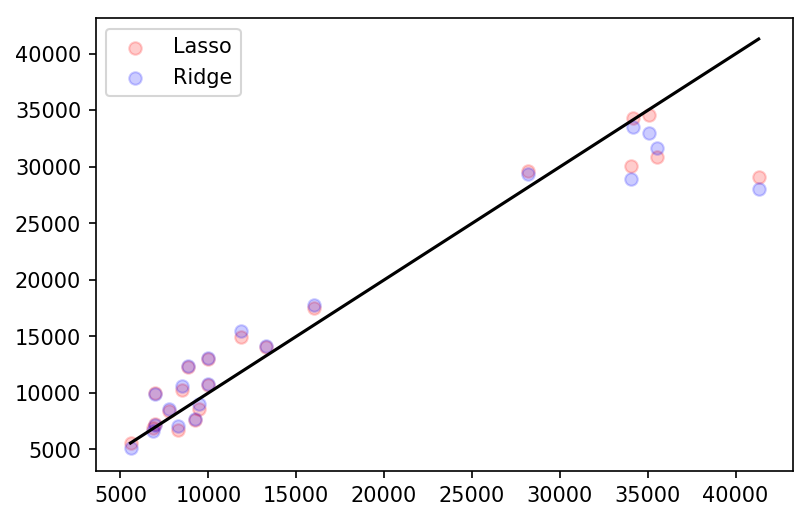

In [103]:
plt.figure(dpi=150)
plt.scatter(y_test, lasso_pred, label="Lasso", c='r', alpha=0.2)
plt.scatter(y_test, ridge_pred, label="Ridge", c='b', alpha=0.2)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],'k', zorder=10)
plt.legend(loc="upper left");

# RandomizedSearchCV vs GridSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

param_dist = {'alpha': sp_rand()}

random_search = RandomizedSearchCV(Ridge(max_iter=1000), param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_absolute_error')

In [56]:
%%timeit
random_search.fit(X_train,y_train)

82.2 ms ± 9.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
type(random_search.best_estimator_)

sklearn.linear_model.ridge.Ridge

In [77]:
random_search.cv_results_

{'mean_fit_time': array([ 0.00357842,  0.00104316,  0.00078154,  0.00093897,  0.00090186,
         0.00097171,  0.00081126,  0.00104396,  0.00102067,  0.00079338,
         0.00099357,  0.0011394 ,  0.00166861,  0.00224447,  0.00092999,
         0.00178377,  0.00184043,  0.00134436,  0.00094326,  0.00050775]),
 'mean_score_time': array([ 0.00045093,  0.00035087,  0.00026973,  0.00030033,  0.00032409,
         0.00029159,  0.00027299,  0.00036041,  0.00031869,  0.00027204,
         0.00033617,  0.00040158,  0.00077844,  0.00056593,  0.00032274,
         0.00078503,  0.0003376 ,  0.00036263,  0.00028976,  0.00017627]),
 'mean_test_score': array([-1822.90724022, -1798.1657637 , -1810.39263596, -1825.84000415,
        -1808.76589476, -1817.76604931, -1826.39596931, -1798.63136442,
        -1810.01582464, -1820.47033019, -1827.78317478, -1800.87308083,
        -1813.19341517, -1803.84737692, -1822.03684171, -1802.56066404,
        -1820.22976608, -1799.79425992, -1800.48418254, -1806.9574198